# Part 0: Sample dataset (LSD)

In 1968, Wagner Agahajanian, and Bing conducted a study to determine whether you could improve a student's math test scores using lysergic acid diethylamide, also known as "LSD."

Here is the original data sources. The code cell below downloads the file from an alternative location.
* Raw data: https://www.stat.ufl.edu/~winner/data/lsd.dat
* Data file description: http://www.stat.ufl.edu/~winner/data/lsd.txt

In [1]:
from pandas import read_fwf
from IPython.display import display
from cse6040utils import download_dataset, localize_file

dataset = {'lsd.dat': '4c119057baf86cff8da03d825d7ce141'}
download_dataset(dataset)
print("\n(All data appears to be ready.)")

'../resource/asnlib/publicdata/lsd.dat' is ready!

(All data appears to be ready.)


Let's take a look at the data, first as a table and then using a scatter plot.

In [2]:
df = read_fwf(localize_file('lsd.dat'),
              colspecs=[(0, 4), (7, 13)],
              names=['lsd_concentration', 'exam_score'])
display(df)

,lsd_concentration,exam_score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65
5,6.00,32.92
6,6.41,29.97


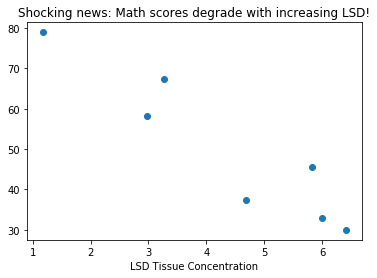

In [3]:
from matplotlib.pyplot import scatter, xlabel, title, plot
%matplotlib inline

scatter(df['lsd_concentration'], df['exam_score'])
xlabel ('LSD Tissue Concentration')
title ('Shocking news: Math scores degrade with increasing LSD!');

## Fitting a model

**Exercise 0** (2 points). Complete the function below so that it computes $\alpha$ and $\beta$ for the univariate model, $y \sim \alpha \cdot x + \beta$, given observations stored as NumPy arrays `y[:]` for the responses and `x[:]` for the predictor.

According to the formulas derived in class (on-campus students) or in the lecture videos (online students), the parameters may be estimated by

$$\begin{eqnarray}
  \alpha & = & \dfrac{x^T y - \frac{1}{m}(u^T x)(u^T y)}
                     {x^T x - \frac{1}{m}(u^T x)^2} \\
   \beta & = & \frac{1}{m} u^T (y - \alpha x)
\end{eqnarray}$$

where $u$ is a vector of all ones.

In [5]:
import numpy as np
def linreg_fit(x, y):
    """Returns (alpha, beta) s.t. y ~ alpha*x + beta."""
    from numpy import ones
    m = len(x) ; assert len(y) == m
    mu=np.ones(len(x))
    alpha=(np.dot(x.T,y)-(1/m)*np.dot(np.dot(mu.T,x),np.dot(mu.T,y)))/(np.dot(x.T,x)-(1/m)*(np.dot(mu.T,x))**2)
    beta=(1/m)*np.dot(mu.T,(y-alpha*x))
    return (alpha, beta)

# Compute the coefficients for the LSD data:
x, y = df['lsd_concentration'], df['exam_score']
alpha, beta = linreg_fit(x, y)

print("alpha:", alpha)
print("beta:", beta)

alpha: -9.009466415296789
beta: 89.12387376799308


In [6]:
# Test cell: `linreg_fit_test`

x, y = df['lsd_concentration'], df['exam_score']
alpha, beta = linreg_fit(x, y)

r = alpha*x + beta - y
ssqr = r.dot(r)
ssqr_ex = 253.88132881

from numpy import isclose
assert isclose(ssqr, ssqr_ex, rtol=.01), "Sum-of-squared residuals is {} instead of {}.".format(ssqr, ssqr_ex)

print("\n(Passed!)")


(Passed!)


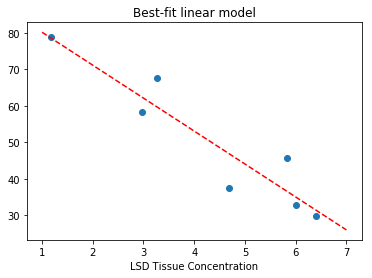

In [7]:
from numpy import linspace, floor, ceil

# Two points make a line:
x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
y_fit = alpha*x_fit + beta

scatter(x, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('LSD Tissue Concentration')
title('Best-fit linear model');

**Fin!** If you've gotten this far without errors, your notebook is ready to submit.